In [ ]:
import os
from urllib import request
import json

# Using the API key (ensure it is correct)
census_api_key = 'afe68052ff3293684250ec862871966bb9760cd1'  # Replace with your actual key

# Construct the URL
url_str = 'https://api.census.gov/data/2020/acs/acs5?get=B01001_001E,NAME&for=county:*&in=state:24&key=' + census_api_key

try:
    # Send the request
    response = request.urlopen(url_str)
    html_str = response.read().decode("utf-8")

    # Convert response to JSON
    json_data = json.loads(html_str)

    # Skip the headers and print the formatted data
    for record in json_data[1:]:
        population = int(record[0])  # Convert population to integer
        county_name = record[1]
        state_code = record[2]
        county_code = record[3]

        # Print in the desired format with commas in population
        print(f"Population: {population:,}, County: {county_name}, State Code: {state_code}, County Code: {county_code}")

except Exception as e:
    print(f"Error fetching data: {e}")



Population: 71,002, County: Allegany County, Maryland, State Code: 24, County Code: 001
Population: 828,193, County: Baltimore County, Maryland, State Code: 24, County Code: 005
Population: 33,260, County: Caroline County, Maryland, State Code: 24, County Code: 011
Population: 168,233, County: Carroll County, Maryland, State Code: 24, County Code: 013
Population: 161,448, County: Charles County, Maryland, State Code: 24, County Code: 017
Population: 31,994, County: Dorchester County, Maryland, State Code: 24, County Code: 019
Population: 29,155, County: Garrett County, Maryland, State Code: 24, County Code: 023
Population: 253,736, County: Harford County, Maryland, State Code: 24, County Code: 025
Population: 19,456, County: Kent County, Maryland, State Code: 24, County Code: 029
Population: 910,551, County: Prince George's County, Maryland, State Code: 24, County Code: 033
Population: 50,163, County: Queen Anne's County, Maryland, State Code: 24, County Code: 035
Population: 25,699, C

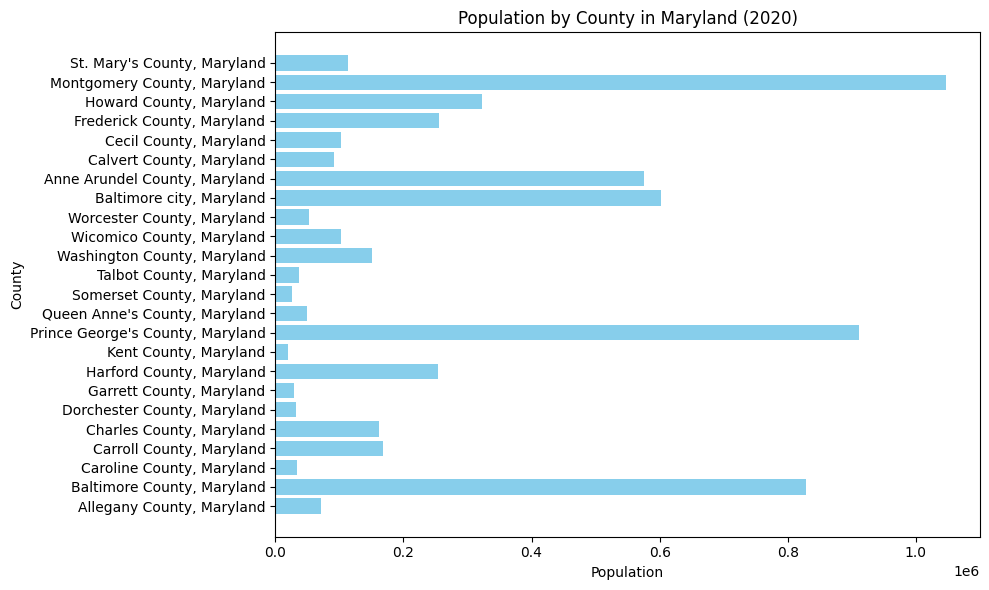

In [ ]:
import os
from urllib import request
import json
import matplotlib.pyplot as plt

# Using the API key (ensure it is correct)
census_api_key = 'afe68052ff3293684250ec862871966bb9760cd1'  # Replace with your actual key

# Construct the URL
url_str = 'https://api.census.gov/data/2020/acs/acs5?get=B01001_001E,NAME&for=county:*&in=state:24&key=' + census_api_key

try:
    # Send the request
    response = request.urlopen(url_str)
    html_str = response.read().decode("utf-8")

    # Convert response to JSON
    json_data = json.loads(html_str)

    # Lists to store county names and population data
    counties = []
    populations = []

    # Skip the headers and extract the data
    for record in json_data[1:]:
        population = int(record[0])  # Convert population to integer
        county_name = record[1]

        # Append to the lists
        counties.append(county_name)
        populations.append(population)

    # Create a horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(counties, populations, color='skyblue')  # This line creates a horizontal bar chart
    plt.xlabel('Population')
    plt.ylabel('County')
    plt.title('Population by County in Maryland (2020)')
    plt.tight_layout()

    # Show the plot
    plt.show()

except Exception as e:
    print(f"Error fetching data: {e}")


In [ ]:
import os
from urllib import request
import json

# Using the API key (ensure it is correct)
census_api_key = 'afe68052ff3293684250ec862871966bb9760cd1'  # Replace with your actual key

# Construct the URL (including male population `B01001_002E` and female population `B01001_026E`)
url_str = f'https://api.census.gov/data/2020/acs/acs5?get=B01001_001E,B01001_002E,B01001_026E,NAME&for=county:*&in=state:24&key={census_api_key}'

try:
    # Send the request
    response = request.urlopen(url_str)
    html_str = response.read().decode("utf-8")

    # Convert response to JSON
    json_data = json.loads(html_str)

    # Initialize variables to track highest male, female populations, and highest ratios
    highest_male_population = 0
    highest_female_population = 0
    highest_male_to_female_ratio = 0
    highest_female_to_male_ratio = 0
    county_with_most_males = ""
    county_with_most_females = ""
    county_with_highest_male_to_female_ratio = ""
    county_with_highest_female_to_male_ratio = ""

    for record in json_data[1:]:
        total_population = int(record[0])  # Total population (B01001_001E)
        male_population = int(record[1])   # Male population (B01001_002E)
        female_population = int(record[2]) # Female population (B01001_026E)
        county_name = record[3]            # County name
        state_code = record[4]
        county_code = record[5]

        # Find the county with the highest male population
        if male_population > highest_male_population:
            highest_male_population = male_population
            county_with_most_males = f"County: {county_name}, State Code: {state_code}, County Code: {county_code}"

        # Find the county with the highest female population
        if female_population > highest_female_population:
            highest_female_population = female_population
            county_with_most_females = f"County: {county_name}, State Code: {state_code}, County Code: {county_code}"

        # Calculate the male-to-female ratio and track the highest
        if female_population > 0:  # To avoid division by zero
            male_female_ratio = male_population / female_population
            if male_female_ratio > highest_male_to_female_ratio:
                highest_male_to_female_ratio = male_female_ratio
                county_with_highest_male_to_female_ratio = f"County: {county_name}, State Code: {state_code}, County Code: {county_code}"

        # Calculate the female-to-male ratio and track the highest
        if male_population > 0:  # To avoid division by zero
            female_male_ratio = female_population / male_population
            if female_male_ratio > highest_female_to_male_ratio:
                highest_female_to_male_ratio = female_male_ratio
                county_with_highest_female_to_male_ratio = f"County: {county_name}, State Code: {state_code}, County Code: {county_code}"

        # Print each county's data with male and female population
        print(f"Population: {total_population:,}, Males: {male_population:,}, Females: {female_population:,}, {county_name}")

    # Print the results
    print("\nCounty with the most males:")
    print(f"{county_with_most_males}, Male Population: {highest_male_population:,}")

    print("\nCounty with the most females:")
    print(f"{county_with_most_females}, Female Population: {highest_female_population:,}")

    print("\nCounty with the highest male-to-female ratio:")
    print(f"{county_with_highest_male_to_female_ratio}, Male-to-Female Ratio: {highest_male_to_female_ratio:.2f}")

    print("\nCounty with the highest female-to-male ratio:")
    print(f"{county_with_highest_female_to_male_ratio}, Female-to-Male Ratio: {highest_female_to_male_ratio:.2f}")

except Exception as e:
    print(f"Error fetching data: {e}")


Population: 71,002, Males: 37,329, Females: 33,673, Allegany County, Maryland
Population: 828,193, Males: 392,167, Females: 436,026, Baltimore County, Maryland
Population: 33,260, Males: 16,312, Females: 16,948, Caroline County, Maryland
Population: 168,233, Males: 83,273, Females: 84,960, Carroll County, Maryland
Population: 161,448, Males: 77,756, Females: 83,692, Charles County, Maryland
Population: 31,994, Males: 14,950, Females: 17,044, Dorchester County, Maryland
Population: 29,155, Males: 14,523, Females: 14,632, Garrett County, Maryland
Population: 253,736, Males: 124,065, Females: 129,671, Harford County, Maryland
Population: 19,456, Males: 9,233, Females: 10,223, Kent County, Maryland
Population: 910,551, Males: 438,050, Females: 472,501, Prince George's County, Maryland
Population: 50,163, Males: 24,958, Females: 25,205, Queen Anne's County, Maryland
Population: 25,699, Males: 13,841, Females: 11,858, Somerset County, Maryland
Population: 37,087, Males: 17,570, Females: 19,5

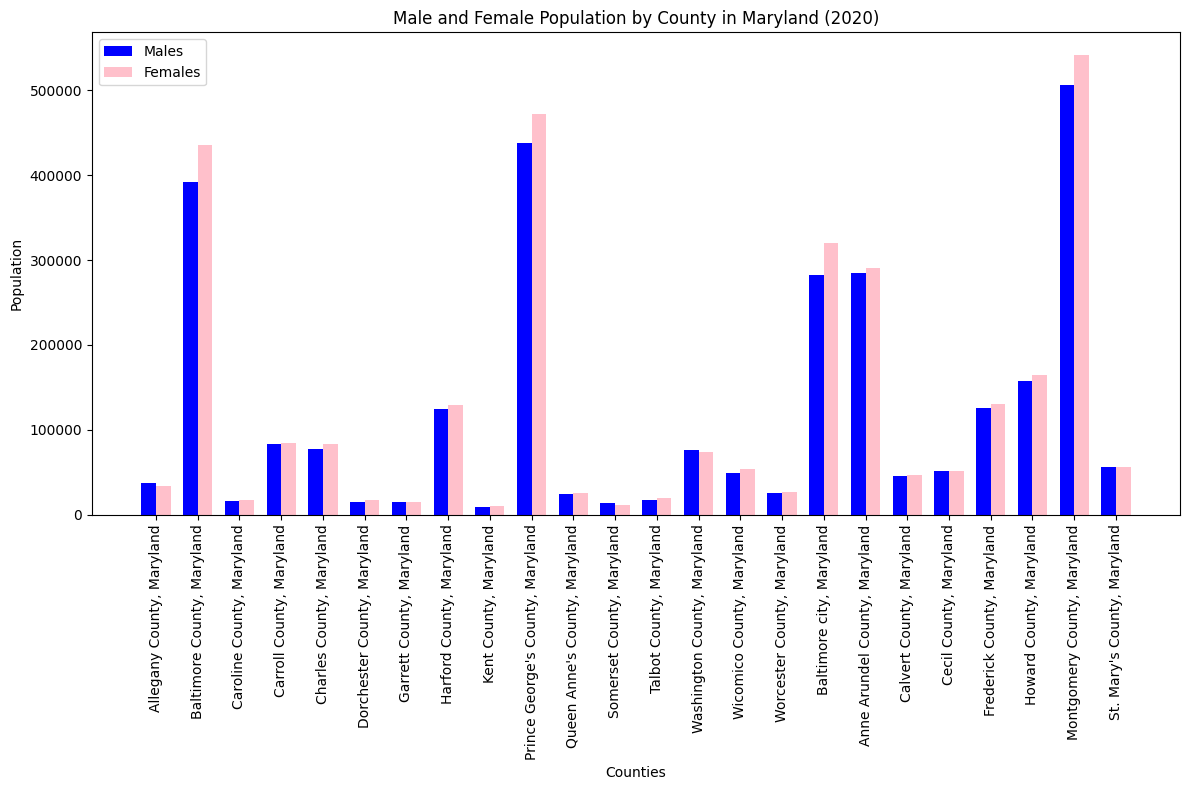

In [ ]:
import os
from urllib import request
import json
import matplotlib.pyplot as plt
import numpy as np

# Using the API key (ensure it is correct)
census_api_key = 'afe68052ff3293684250ec862871966bb9760cd1'  # Replace with your actual key

# Construct the URL (including male population `B01001_002E` and female population `B01001_026E`)
url_str = f'https://api.census.gov/data/2020/acs/acs5?get=B01001_001E,B01001_002E,B01001_026E,NAME&for=county:*&in=state:24&key={census_api_key}'

try:
    # Send the request
    response = request.urlopen(url_str)
    html_str = response.read().decode("utf-8")

    # Convert response to JSON
    json_data = json.loads(html_str)

    # Lists to store county names and male/female population data
    counties = []
    male_populations = []
    female_populations = []

    # Skip the headers and extract the data
    for record in json_data[1:]:
        county_name = record[3]            # County name
        male_population = int(record[1])   # Male population (B01001_002E)
        female_population = int(record[2]) # Female population (B01001_026E)

        # Append to the lists
        counties.append(county_name)
        male_populations.append(male_population)
        female_populations.append(female_population)

    # Convert counties to numpy array for plotting
    counties = np.array(counties)

    # Create a grouped bar chart
    bar_width = 0.35
    index = np.arange(len(counties))

    plt.figure(figsize=(12, 8))

    # Plot male and female populations
    plt.bar(index, male_populations, bar_width, label='Males', color='blue')
    plt.bar(index + bar_width, female_populations, bar_width, label='Females', color='pink')

    # Add labels and title
    plt.xlabel('Counties')
    plt.ylabel('Population')
    plt.title('Male and Female Population by County in Maryland (2020)')
    plt.xticks(index + bar_width / 2, counties, rotation=90)
    plt.legend()

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error fetching data: {e}")


<BarContainer object of 24 artists>

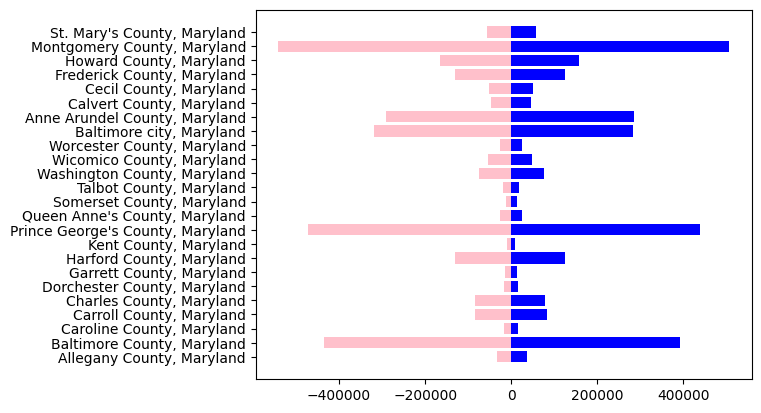

In [ ]:
plt.barh(counties, male_populations, color='blue', label='Males')
plt.barh(counties, [-x for x in female_populations], color='pink', label='Females')


In [ ]:
import os
from urllib import request
import json

# Using the API key (ensure it is correct)
census_api_key = 'afe68052ff3293684250ec862871966bb9760cd1'  # Replace with your actual key

# Construct the URL (including the relevant age groups for under 18 population)
url_str = f'https://api.census.gov/data/2020/acs/acs5?get=B01001_001E,B01001_003E,B01001_004E,B01001_005E,B01001_006E,B01001_027E,B01001_028E,B01001_029E,B01001_030E,NAME&for=county:*&in=state:24&key={census_api_key}'

try:
    # Send the request
    response = request.urlopen(url_str)
    html_str = response.read().decode("utf-8")

    # Convert response to JSON
    json_data = json.loads(html_str)

    # Initialize variables to track population percentages
    for record in json_data[1:]:
        total_population = int(record[0])  # Total population (B01001_001E)
        males_under_5 = int(record[1])
        males_5_to_9 = int(record[2])
        males_10_to_14 = int(record[3])
        males_15_to_17 = int(record[4])
        females_under_5 = int(record[5])
        females_5_to_9 = int(record[6])
        females_10_to_14 = int(record[7])
        females_15_to_17 = int(record[8])

        # Calculate the total population under 18
        under_18_population = (males_under_5 + males_5_to_9 + males_10_to_14 + males_15_to_17 +
                               females_under_5 + females_5_to_9 + females_10_to_14 + females_15_to_17)

        # Population over 18
        over_18_population = total_population - under_18_population

        # Calculate the percentage of the population over 18
        if total_population > 0:
            percent_over_18 = (over_18_population / total_population) * 100
        else:
            percent_over_18 = 0

        # Print the results for each county
        county_name = record[9]
        state_code = record[10]
        county_code = record[11]
        print(f"County: {county_name}, Percent over 18: {percent_over_18:.2f}%")

except Exception as e:
    print(f"Error fetching data: {e}")


County: Allegany County, Maryland, Percent over 18: 82.67%
County: Baltimore County, Maryland, Percent over 18: 78.38%
County: Caroline County, Maryland, Percent over 18: 76.40%
County: Carroll County, Maryland, Percent over 18: 78.23%
County: Charles County, Maryland, Percent over 18: 76.00%
County: Dorchester County, Maryland, Percent over 18: 78.95%
County: Garrett County, Maryland, Percent over 18: 81.44%
County: Harford County, Maryland, Percent over 18: 77.71%
County: Kent County, Maryland, Percent over 18: 84.35%
County: Prince George's County, Maryland, Percent over 18: 77.72%
County: Queen Anne's County, Maryland, Percent over 18: 78.56%
County: Somerset County, Maryland, Percent over 18: 82.92%
County: Talbot County, Maryland, Percent over 18: 81.68%
County: Washington County, Maryland, Percent over 18: 78.21%
County: Wicomico County, Maryland, Percent over 18: 78.09%
County: Worcester County, Maryland, Percent over 18: 82.81%
County: Baltimore city, Maryland, Percent over 18

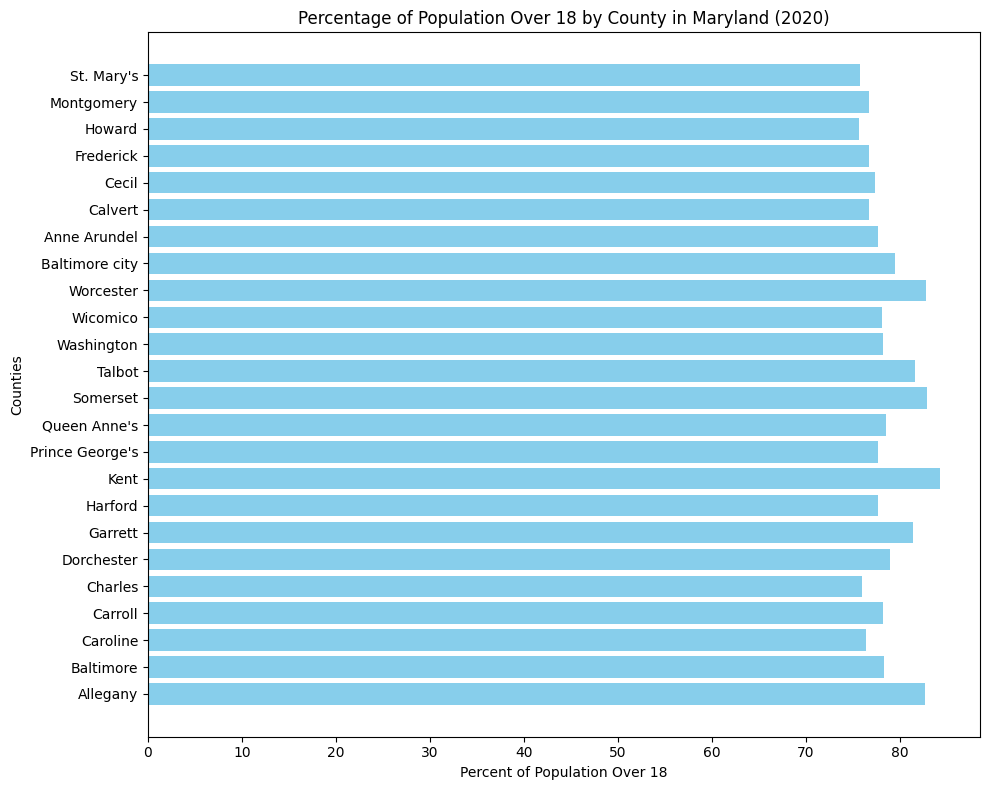

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data (from your print statements)
counties = ["Allegany", "Baltimore", "Caroline", "Carroll", "Charles", "Dorchester",
            "Garrett", "Harford", "Kent", "Prince George's", "Queen Anne's", "Somerset",
            "Talbot", "Washington", "Wicomico", "Worcester", "Baltimore city",
            "Anne Arundel", "Calvert", "Cecil", "Frederick", "Howard", "Montgomery",
            "St. Mary's"]
percentages_over_18 = [82.67, 78.38, 76.40, 78.23, 76.00, 78.95, 81.44, 77.71,
                       84.35, 77.72, 78.56, 82.92, 81.68, 78.21, 78.09, 82.81,
                       79.54, 77.68, 76.80, 77.36, 76.78, 75.64, 76.76, 75.78]

# Create the bar chart
plt.figure(figsize=(10, 8))
plt.barh(counties, percentages_over_18, color='skyblue')
plt.xlabel('Percent of Population Over 18')
plt.ylabel('Counties')
plt.title('Percentage of Population Over 18 by County in Maryland (2020)')
plt.tight_layout()
plt.show()


In [ ]:
import folium
import requests
import json

# GeoJSON file for Maryland counties (provided link)
geojson_url = "https://raw.githubusercontent.com/frankrowe/maryland-geojson/refs/heads/master/maryland-counties.geojson"

# Download the GeoJSON data
geojson_data = requests.get(geojson_url).json()

# Your population percentage data (use the collected data here)
county_data = {
    "Allegany": 82.67, "Baltimore": 78.38, "Caroline": 76.40, "Carroll": 78.23, "Charles": 76.00,
    "Dorchester": 78.95, "Garrett": 81.44, "Harford": 77.71, "Kent": 84.35, "Prince George's": 77.72,
    "Queen Anne's": 78.56, "Somerset": 82.92, "Talbot": 81.68, "Washington": 78.21, "Wicomico": 78.09,
    "Worcester": 82.81, "Baltimore city": 79.54, "Anne Arundel": 77.68, "Calvert": 76.80,
    "Cecil": 77.36, "Frederick": 76.78, "Howard": 75.64, "Montgomery": 76.76, "St. Mary's": 75.78
}

# Create a Folium map centered on Maryland
m = folium.Map(location=[39.0458, -76.6413], zoom_start=7)

# Add the choropleth layer to the map
folium.Choropleth(
    geo_data=geojson_data,
    name="choropleth",
    data=county_data,
    columns=["County", "Percentage Over 18"],
    key_on="feature.properties.name",  # Adjust this based on the structure of your GeoJSON
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Percentage of Population Over 18"
).add_to(m)

# Save the map to an HTML file
m.save('maryland_population_choropleth.html')

print("Choropleth map generated successfully.")




Choropleth map generated successfully.


In [ ]:
import os
from urllib import request
import json

# Using the API key (ensure it is correct)
census_api_key = 'afe68052ff3293684250ec862871966bb9760cd1'  # Replace with your actual key

# Construct the URL to get total population over 18 for males and females
url_str = f'https://api.census.gov/data/2020/acs/acs5?get=B01001_007E,B01001_008E,B01001_009E,B01001_010E,B01001_011E,B01001_012E,B01001_013E,B01001_014E,B01001_015E,B01001_016E,B01001_017E,B01001_018E,B01001_019E,B01001_020E,B01001_021E,B01001_022E,B01001_023E,B01001_031E,B01001_032E,B01001_033E,B01001_034E,B01001_035E,B01001_036E,B01001_037E,B01001_038E,B01001_039E,B01001_040E,B01001_041E,B01001_042E,B01001_043E,B01001_044E,B01001_045E,B01001_046E,B01001_047E,NAME&for=county:*&in=state:24&key={census_api_key}'

try:
    # Send the request
    response = request.urlopen(url_str)
    html_str = response.read().decode("utf-8")

    # Convert response to JSON
    json_data = json.loads(html_str)

    # Initialize variables to track population over 18
    for record in json_data[1:]:
        # Sum the male population over 18 by adding the relevant age groups
        males_18_to_19 = int(record[0])
        males_20_to_24 = int(record[1])
        males_25_to_29 = int(record[2])
        males_30_to_34 = int(record[3])
        males_35_to_39 = int(record[4])
        males_40_to_44 = int(record[5])
        males_45_to_49 = int(record[6])
        males_50_to_54 = int(record[7])
        males_55_to_59 = int(record[8])
        males_60_to_61 = int(record[9])
        males_62_to_64 = int(record[10])
        males_65_to_66 = int(record[11])
        males_67_to_69 = int(record[12])
        males_70_to_74 = int(record[13])
        males_75_to_79 = int(record[14])
        males_80_to_84 = int(record[15])
        males_85_and_over = int(record[16])

        # Sum the female population over 18 by adding the relevant age groups
        females_18_to_19 = int(record[17])
        females_20_to_24 = int(record[18])
        females_25_to_29 = int(record[19])
        females_30_to_34 = int(record[20])
        females_35_to_39 = int(record[21])
        females_40_to_44 = int(record[22])
        females_45_to_49 = int(record[23])
        females_50_to_54 = int(record[24])
        females_55_to_59 = int(record[25])
        females_60_to_61 = int(record[26])
        females_62_to_64 = int(record[27])
        females_65_to_66 = int(record[28])
        females_67_to_69 = int(record[29])
        females_70_to_74 = int(record[30])
        females_75_to_79 = int(record[31])
        females_80_to_84 = int(record[32])
        females_85_and_over = int(record[33])

        # Total male and female population over 18
        total_males_over_18 = (males_18_to_19 + males_20_to_24 + males_25_to_29 + males_30_to_34 +
                               males_35_to_39 + males_40_to_44 + males_45_to_49 + males_50_to_54 +
                               males_55_to_59 + males_60_to_61 + males_62_to_64 + males_65_to_66 +
                               males_67_to_69 + males_70_to_74 + males_75_to_79 + males_80_to_84 +
                               males_85_and_over)

        total_females_over_18 = (females_18_to_19 + females_20_to_24 + females_25_to_29 + females_30_to_34 +
                                 females_35_to_39 + females_40_to_44 + females_45_to_49 + females_50_to_54 +
                                 females_55_to_59 + females_60_to_61 + females_62_to_64 + females_65_to_66 +
                                 females_67_to_69 + females_70_to_74 + females_75_to_79 + females_80_to_84 +
                                 females_85_and_over)

        # Total population over 18
        total_over_18 = total_males_over_18 + total_females_over_18

        # Print the results for each county
        county_name = record[34]
        state_code = record[35]
        county_code = record[36]
        print(f"County: {county_name}, Total Population over 18: {total_over_18:,}")

except Exception as e:
    print(f"Error fetching data: {e}")


County: Allegany County, Maryland, Total Population over 18: 54,738
County: Baltimore County, Maryland, Total Population over 18: 611,053
County: Caroline County, Maryland, Total Population over 18: 24,118
County: Carroll County, Maryland, Total Population over 18: 124,441
County: Charles County, Maryland, Total Population over 18: 118,677
County: Dorchester County, Maryland, Total Population over 18: 23,698
County: Garrett County, Maryland, Total Population over 18: 22,134
County: Harford County, Maryland, Total Population over 18: 187,963
County: Kent County, Maryland, Total Population over 18: 15,003
County: Prince George's County, Maryland, Total Population over 18: 682,094
County: Queen Anne's County, Maryland, Total Population over 18: 37,348
County: Somerset County, Maryland, Total Population over 18: 20,376
County: Talbot County, Maryland, Total Population over 18: 27,111
County: Washington County, Maryland, Total Population over 18: 111,334
County: Wicomico County, Maryland, T

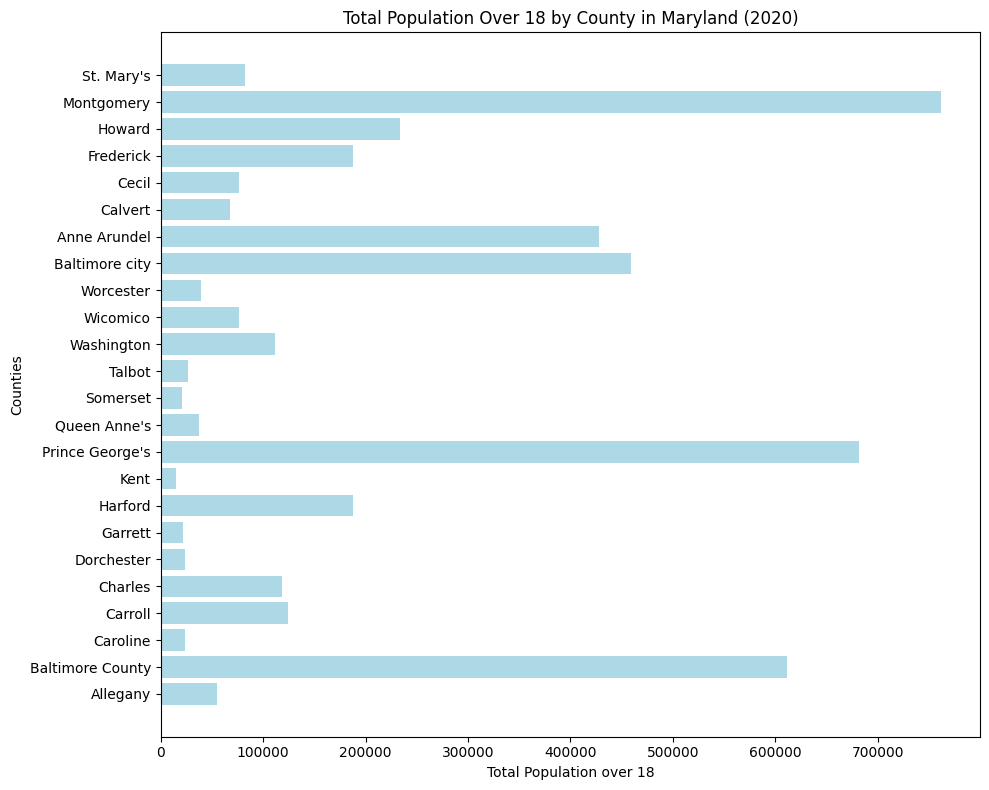

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your output
counties = ["Allegany", "Baltimore County", "Caroline", "Carroll", "Charles", "Dorchester", "Garrett", "Harford",
            "Kent", "Prince George's", "Queen Anne's", "Somerset", "Talbot", "Washington", "Wicomico", "Worcester",
            "Baltimore city", "Anne Arundel", "Calvert", "Cecil", "Frederick", "Howard", "Montgomery", "St. Mary's"]
population_over_18 = [54738, 611053, 24118, 124441, 118677, 23698, 22134, 187963,
                      15003, 682094, 37348, 20376, 27111, 111334, 76705, 39209,
                      459065, 427724, 68075, 76256, 187842, 234064, 761683, 82553]

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(counties, population_over_18, color='lightblue')
plt.xlabel('Total Population over 18')
plt.ylabel('Counties')
plt.title('Total Population Over 18 by County in Maryland (2020)')
plt.tight_layout()
plt.show()


In [ ]:
import os
from urllib import request
import json

# Using the API key (ensure it is correct)
census_api_key = 'afe68052ff3293684250ec862871966bb9760cd1'  # Replace with your actual key

# Construct the URL (including female population breakdown for over 18)
url_str = f'https://api.census.gov/data/2020/acs/acs5?get=B01001_031E,B01001_032E,B01001_033E,B01001_034E,B01001_035E,B01001_036E,B01001_037E,B01001_038E,B01001_039E,B01001_040E,B01001_041E,B01001_042E,B01001_043E,B01001_044E,B01001_045E,B01001_046E,B01001_047E,NAME&for=county:*&in=state:24&key={census_api_key}'

try:
    # Send the request
    response = request.urlopen(url_str)
    html_str = response.read().decode("utf-8")

    # Convert response to JSON
    json_data = json.loads(html_str)

    # Initialize variables to track female population over 18
    for record in json_data[1:]:
        # Sum the female population over 18 by adding the relevant age groups
        females_18_to_19 = int(record[0])
        females_20_to_24 = int(record[1])
        females_25_to_29 = int(record[2])
        females_30_to_34 = int(record[3])
        females_35_to_39 = int(record[4])
        females_40_to_44 = int(record[5])
        females_45_to_49 = int(record[6])
        females_50_to_54 = int(record[7])
        females_55_to_59 = int(record[8])
        females_60_to_61 = int(record[9])
        females_62_to_64 = int(record[10])
        females_65_to_66 = int(record[11])
        females_67_to_69 = int(record[12])
        females_70_to_74 = int(record[13])
        females_75_to_79 = int(record[14])
        females_80_to_84 = int(record[15])
        females_85_and_over = int(record[16])

        # Total female population over 18
        total_females_over_18 = (females_18_to_19 + females_20_to_24 + females_25_to_29 + females_30_to_34 +
                                 females_35_to_39 + females_40_to_44 + females_45_to_49 + females_50_to_54 +
                                 females_55_to_59 + females_60_to_61 + females_62_to_64 + females_65_to_66 +
                                 females_67_to_69 + females_70_to_74 + females_75_to_79 + females_80_to_84 +
                                 females_85_and_over)

        # Print the results for each county
        county_name = record[17]
        state_code = record[18]
        county_code = record[19]
        print(f"County: {county_name}, Total Females over 18: {total_females_over_18:,}")

except Exception as e:
    print(f"Error fetching data: {e}")


County: Allegany County, Maryland, Total Females over 18: 25,420
County: Baltimore County, Maryland, Total Females over 18: 323,631
County: Caroline County, Maryland, Total Females over 18: 12,259
County: Carroll County, Maryland, Total Females over 18: 62,510
County: Charles County, Maryland, Total Females over 18: 62,158
County: Dorchester County, Maryland, Total Females over 18: 12,631
County: Garrett County, Maryland, Total Females over 18: 11,145
County: Harford County, Maryland, Total Females over 18: 96,245
County: Kent County, Maryland, Total Females over 18: 7,819
County: Prince George's County, Maryland, Total Females over 18: 356,477
County: Queen Anne's County, Maryland, Total Females over 18: 18,908
County: Somerset County, Maryland, Total Females over 18: 9,070
County: Talbot County, Maryland, Total Females over 18: 14,238
County: Washington County, Maryland, Total Females over 18: 53,798
County: Wicomico County, Maryland, Total Females over 18: 40,832
County: Worcester C

In [ ]:
import os
from urllib import request
import json

# Using the API key (ensure it is correct)
census_api_key = 'afe68052ff3293684250ec862871966bb9760cd1'  # Replace with your actual key

# Construct the URL to get total population and female population over 18
url_str = f'https://api.census.gov/data/2020/acs/acs5?get=B01001_001E,B01001_031E,B01001_032E,B01001_033E,B01001_034E,B01001_035E,B01001_036E,B01001_037E,B01001_038E,B01001_039E,B01001_040E,B01001_041E,B01001_042E,B01001_043E,B01001_044E,B01001_045E,B01001_046E,B01001_047E,NAME&for=county:*&in=state:24&key={census_api_key}'

try:
    # Send the request
    response = request.urlopen(url_str)
    html_str = response.read().decode("utf-8")

    # Convert response to JSON
    json_data = json.loads(html_str)

    # Initialize variables to track population percentages
    for record in json_data[1:]:
        total_population = int(record[0])  # Total population (B01001_001E)

        # Sum the female population over 18 by adding the relevant age groups
        females_18_to_19 = int(record[1])
        females_20_to_24 = int(record[2])
        females_25_to_29 = int(record[3])
        females_30_to_34 = int(record[4])
        females_35_to_39 = int(record[5])
        females_40_to_44 = int(record[6])
        females_45_to_49 = int(record[7])
        females_50_to_54 = int(record[8])
        females_55_to_59 = int(record[9])
        females_60_to_61 = int(record[10])
        females_62_to_64 = int(record[11])
        females_65_to_66 = int(record[12])
        females_67_to_69 = int(record[13])
        females_70_to_74 = int(record[14])
        females_75_to_79 = int(record[15])
        females_80_to_84 = int(record[16])
        females_85_and_over = int(record[17])

        # Total female population over 18
        total_females_over_18 = (females_18_to_19 + females_20_to_24 + females_25_to_29 + females_30_to_34 +
                                 females_35_to_39 + females_40_to_44 + females_45_to_49 + females_50_to_54 +
                                 females_55_to_59 + females_60_to_61 + females_62_to_64 + females_65_to_66 +
                                 females_67_to_69 + females_70_to_74 + females_75_to_79 + females_80_to_84 +
                                 females_85_and_over)

        # Calculate the percentage of the population that is female and over 18
        if total_population > 0:
            percent_females_over_18 = (total_females_over_18 / total_population) * 100
        else:
            percent_females_over_18 = 0

        # Print the results for each county
        county_name = record[18]
        state_code = record[19]
        county_code = record[20]
        print(f"County: {county_name}, Percent of Females over 18: {percent_females_over_18:.2f}%")

except Exception as e:
    print(f"Error fetching data: {e}")


County: Allegany County, Maryland, Percent of Females over 18: 35.80%
County: Baltimore County, Maryland, Percent of Females over 18: 39.08%
County: Caroline County, Maryland, Percent of Females over 18: 36.86%
County: Carroll County, Maryland, Percent of Females over 18: 37.16%
County: Charles County, Maryland, Percent of Females over 18: 38.50%
County: Dorchester County, Maryland, Percent of Females over 18: 39.48%
County: Garrett County, Maryland, Percent of Females over 18: 38.23%
County: Harford County, Maryland, Percent of Females over 18: 37.93%
County: Kent County, Maryland, Percent of Females over 18: 40.19%
County: Prince George's County, Maryland, Percent of Females over 18: 39.15%
County: Queen Anne's County, Maryland, Percent of Females over 18: 37.69%
County: Somerset County, Maryland, Percent of Females over 18: 35.29%
County: Talbot County, Maryland, Percent of Females over 18: 38.39%
County: Washington County, Maryland, Percent of Females over 18: 35.73%
County: Wicomi

In [ ]:
import os
from urllib import request
import json

# Using your valid API key
census_api_key = 'afe68052ff3293684250ec862871966bb9760cd1'

# Construct the URL to get total population and U.S. citizens (native and naturalized)
url_str = f'https://api.census.gov/data/2020/acs/acs5?get=B05001_001E,B05001_002E,NAME&for=county:*&in=state:24&key={census_api_key}'

try:
    # Send the request
    response = request.urlopen(url_str)
    html_str = response.read().decode("utf-8")

    # Convert response to JSON
    json_data = json.loads(html_str)

    # Initialize variables to track population and U.S. citizens
    for record in json_data[1:]:
        total_population = int(record[0])  # Total population
        total_citizens = int(record[1])   # Total U.S. citizens

        # Calculate the percentage of U.S. citizens
        if total_population > 0:
            percent_citizens = (total_citizens / total_population) * 100
        else:
            percent_citizens = 0

        # Print the results for each county
        county_name = record[2]
        print(f"County: {county_name}, Total Citizens: {total_citizens:,}, Percentage: {percent_citizens:.2f}%")

except Exception as e:
    print(f"Error fetching data: {e}")


County: Allegany County, Maryland, Total Citizens: 68,946, Percentage: 97.10%
County: Baltimore County, Maryland, Total Citizens: 715,687, Percentage: 86.42%
County: Caroline County, Maryland, Total Citizens: 30,827, Percentage: 92.68%
County: Carroll County, Maryland, Total Citizens: 159,787, Percentage: 94.98%
County: Charles County, Maryland, Total Citizens: 148,048, Percentage: 91.70%
County: Dorchester County, Maryland, Total Citizens: 30,257, Percentage: 94.57%
County: Garrett County, Maryland, Total Citizens: 28,651, Percentage: 98.27%
County: Harford County, Maryland, Total Citizens: 236,257, Percentage: 93.11%
County: Kent County, Maryland, Total Citizens: 18,376, Percentage: 94.45%
County: Prince George's County, Maryland, Total Citizens: 687,991, Percentage: 75.56%
County: Queen Anne's County, Maryland, Total Citizens: 47,542, Percentage: 94.78%
County: Somerset County, Maryland, Total Citizens: 24,643, Percentage: 95.89%
County: Talbot County, Maryland, Total Citizens: 34,0

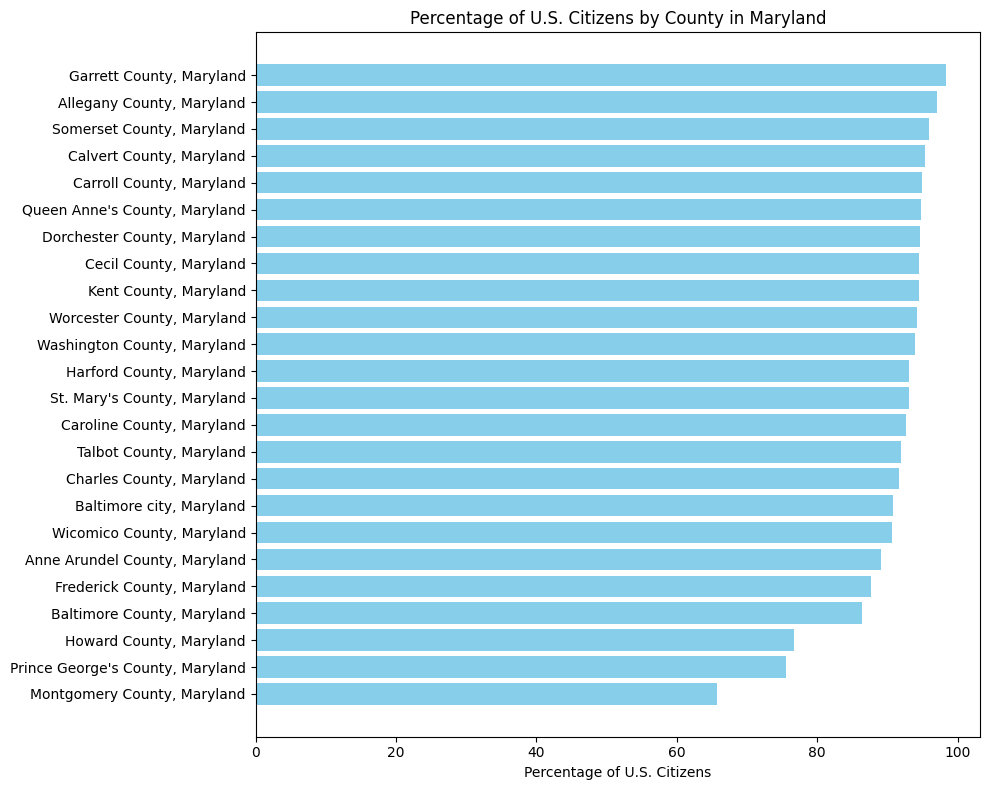

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the output
data = {
    'County': [
        'Allegany County, Maryland', 'Baltimore County, Maryland', 'Caroline County, Maryland',
        'Carroll County, Maryland', 'Charles County, Maryland', 'Dorchester County, Maryland',
        'Garrett County, Maryland', 'Harford County, Maryland', 'Kent County, Maryland',
        "Prince George's County, Maryland", "Queen Anne's County, Maryland", 'Somerset County, Maryland',
        'Talbot County, Maryland', 'Washington County, Maryland', 'Wicomico County, Maryland',
        'Worcester County, Maryland', 'Baltimore city, Maryland', 'Anne Arundel County, Maryland',
        'Calvert County, Maryland', 'Cecil County, Maryland', 'Frederick County, Maryland',
        'Howard County, Maryland', 'Montgomery County, Maryland', "St. Mary's County, Maryland"
    ],
    'Percentage of U.S. Citizens': [
        97.10, 86.42, 92.68, 94.98, 91.70, 94.57, 98.27, 93.11, 94.45,
        75.56, 94.78, 95.89, 91.92, 93.86, 90.63, 94.17, 90.84, 89.12,
        95.29, 94.49, 87.64, 76.69, 65.69, 93.02
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort data by percentage
df = df.sort_values('Percentage of U.S. Citizens')

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(df['County'], df['Percentage of U.S. Citizens'], color='skyblue')
plt.xlabel('Percentage of U.S. Citizens')
plt.title('Percentage of U.S. Citizens by County in Maryland')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import os
from urllib import request
import json

# Using your valid API key
census_api_key = 'afe68052ff3293684250ec862871966bb9760cd1'

# Construct the URL to get total population, U.S. citizens, and race data
url_str = f'https://api.census.gov/data/2020/acs/acs5?get=B05001_001E,B05001_002E,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,NAME&for=county:*&in=state:24&key={census_api_key}'

try:
    # Send the request
    response = request.urlopen(url_str)
    html_str = response.read().decode("utf-8")

    # Convert response to JSON
    json_data = json.loads(html_str)

    # Print header
    print("County, Total Population, Total Citizens, Total (Race), White, Black or African American, American Indian, Asian")

    # Iterate over the data
    for record in json_data[1:]:
        total_population = int(record[0])  # Total population
        total_citizens = int(record[1])    # Total U.S. citizens
        total_race_population = int(record[2])  # Total population for race data
        white_alone = int(record[3])  # White alone
        black_alone = int(record[4])  # Black or African American alone
        american_indian_alone = int(record[5])  # American Indian and Alaska Native alone
        asian_alone = int(record[6])  # Asian alone
        county_name = record[7]       # County name

        # Print the results for each county
        print(f"{county_name}, {total_population:,}, {total_citizens:,}, {total_race_population:,}, {white_alone:,}, {black_alone:,}, {american_indian_alone:,}, {asian_alone:,}")

except Exception as e:
    print(f"Error fetching data: {e}")


County, Total Population, Total Citizens, Total (Race), White, Black or African American, American Indian, Asian
Allegany County, Maryland, 71,002, 68,946, 71,002, 62,420, 5,954, 117, 674
Baltimore County, Maryland, 828,193, 715,687, 828,193, 487,523, 243,098, 2,111, 50,294
Caroline County, Maryland, 33,260, 30,827, 33,260, 26,076, 4,589, 94, 170
Carroll County, Maryland, 168,233, 159,787, 168,233, 152,180, 6,088, 437, 3,437
Charles County, Maryland, 161,448, 148,048, 161,448, 67,215, 76,590, 1,028, 5,039
Dorchester County, Maryland, 31,994, 30,257, 31,994, 20,777, 8,216, 12, 377
Garrett County, Maryland, 29,155, 28,651, 29,155, 28,162, 348, 50, 128
Harford County, Maryland, 253,736, 236,257, 253,736, 197,023, 35,208, 380, 6,877
Kent County, Maryland, 19,456, 18,376, 19,456, 15,484, 2,730, 15, 222
Prince George's County, Maryland, 910,551, 687,991, 910,551, 146,540, 565,972, 2,969, 38,755
Queen Anne's County, Maryland, 50,163, 47,542, 50,163, 43,995, 2,961, 52, 549
Somerset County, Mar

In [ ]:
import os
from urllib import request
import json
import pandas as pd

# Using your valid API key
census_api_key = 'afe68052ff3293684250ec862871966bb9760cd1'

# Construct the URL to get total population, U.S. citizens, and race data
url_str = f'https://api.census.gov/data/2020/acs/acs5?get=B05001_001E,B05001_002E,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,NAME&for=county:*&in=state:24&key={census_api_key}'

try:
    # Send the request
    response = request.urlopen(url_str)
    html_str = response.read().decode("utf-8")

    # Convert response to JSON
    json_data = json.loads(html_str)

    # Prepare lists for DataFrame
    counties = []
    total_population = []
    total_citizens = []
    white_alone = []
    black_alone = []
    american_indian_alone = []
    asian_alone = []

    # Iterate over the data and append to lists
    for record in json_data[1:]:
        counties.append(record[7])
        total_population.append(int(record[0]))
        total_citizens.append(int(record[1]))
        white_alone.append(int(record[3]))
        black_alone.append(int(record[4]))
        american_indian_alone.append(int(record[5]))
        asian_alone.append(int(record[6]))

    # Create a DataFrame
    df = pd.DataFrame({
        'County': counties,
        'Total Population': total_population,
        'Total Citizens': total_citizens,
        'White': white_alone,
        'Black or African American': black_alone,
        'American Indian': american_indian_alone,
        'Asian': asian_alone
    })

    # Display the DataFrame
    import ace_tools as tools; tools.display_dataframe_to_user(name="Maryland Race Data", dataframe=df)

except Exception as e:
    print(f"Error fetching data: {e}")


Error fetching data: No module named 'ace_tools'


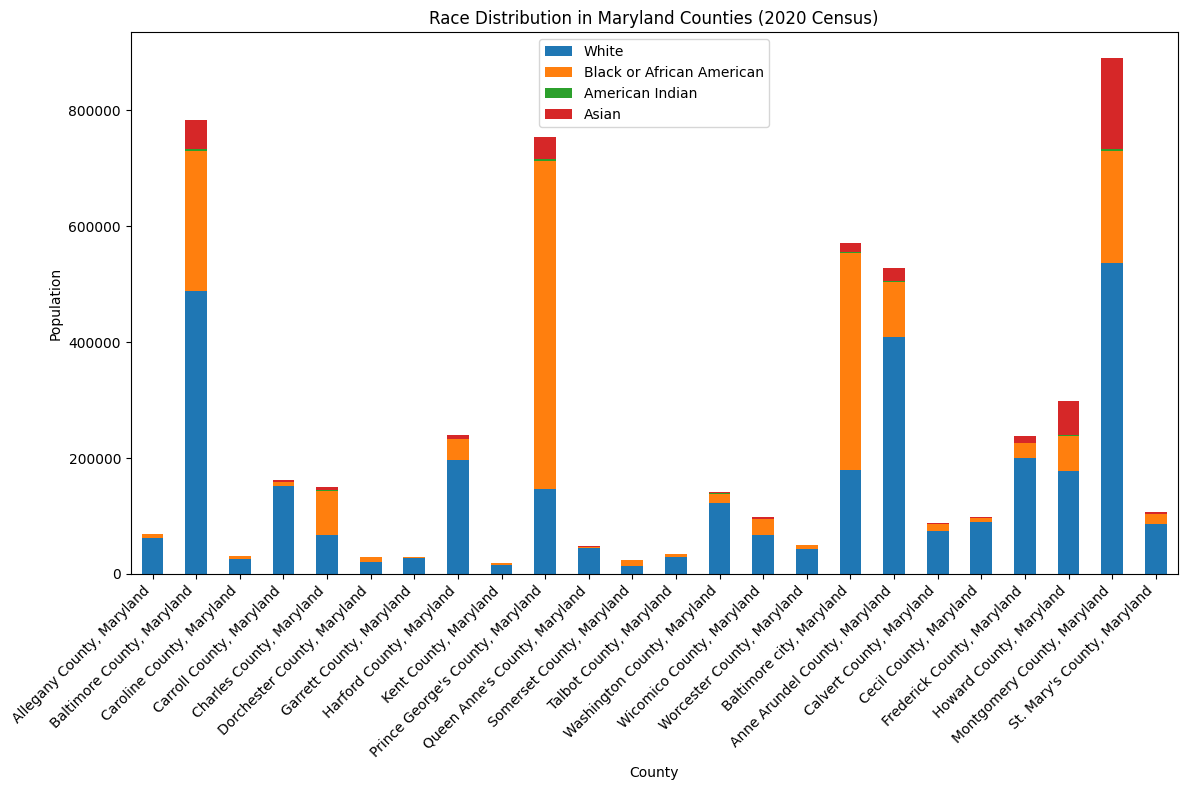

In [ ]:
import os
from urllib import request
import json
import pandas as pd
import matplotlib.pyplot as plt

# Using your valid API key
census_api_key = 'afe68052ff3293684250ec862871966bb9760cd1'

# Construct the URL to get total population, U.S. citizens, and race data
url_str = f'https://api.census.gov/data/2020/acs/acs5?get=B05001_001E,B05001_002E,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,NAME&for=county:*&in=state:24&key={census_api_key}'

try:
    # Send the request
    response = request.urlopen(url_str)
    html_str = response.read().decode("utf-8")

    # Convert response to JSON
    json_data = json.loads(html_str)

    # Prepare lists for DataFrame
    counties = []
    total_population = []
    total_citizens = []
    white_alone = []
    black_alone = []
    american_indian_alone = []
    asian_alone = []

    # Iterate over the data and append to lists
    for record in json_data[1:]:
        counties.append(record[7])
        total_population.append(int(record[0]))
        total_citizens.append(int(record[1]))
        white_alone.append(int(record[3]))
        black_alone.append(int(record[4]))
        american_indian_alone.append(int(record[5]))
        asian_alone.append(int(record[6]))

    # Create a DataFrame
    df = pd.DataFrame({
        'County': counties,
        'Total Population': total_population,
        'Total Citizens': total_citizens,
        'White': white_alone,
        'Black or African American': black_alone,
        'American Indian': american_indian_alone,
        'Asian': asian_alone
    })

    # Plot a bar chart for race data
    df.set_index('County')[['White', 'Black or African American', 'American Indian', 'Asian']].plot(kind='bar', stacked=True, figsize=(12, 8))

    plt.title('Race Distribution in Maryland Counties (2020 Census)')
    plt.xlabel('County')
    plt.ylabel('Population')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()

except Exception as e:
    print(f"Error fetching data: {e}")


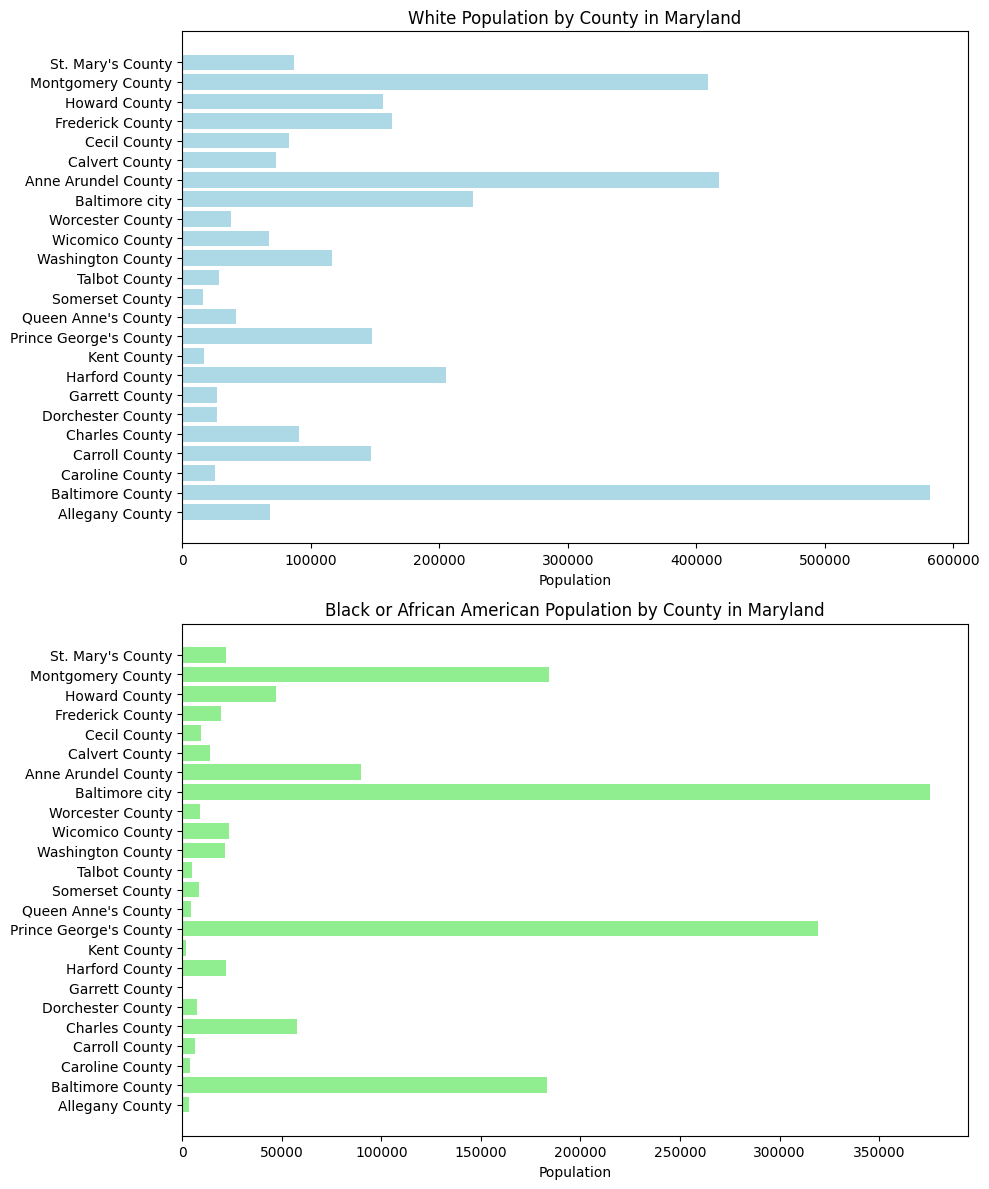

In [ ]:
# Sample race data for counties in Maryland
data = {
    'County': [
        'Allegany County', 'Baltimore County', 'Caroline County',
        'Carroll County', 'Charles County', 'Dorchester County',
        'Garrett County', 'Harford County', 'Kent County',
        "Prince George's County", "Queen Anne's County", 'Somerset County',
        'Talbot County', 'Washington County', 'Wicomico County',
        'Worcester County', 'Baltimore city', 'Anne Arundel County',
        'Calvert County', 'Cecil County', 'Frederick County',
        'Howard County', 'Montgomery County', "St. Mary's County"
    ],
    'White': [
        67940, 581933, 25433, 147050, 91173, 27190, 26833, 205219, 16919,
        147891, 41891, 16397, 28282, 116186, 67687, 37688, 226471, 417812,
        73113, 83344, 162823, 156442, 409278, 86815
    ],
    'Black': [
        3527, 183405, 3997, 6602, 57468, 7293, 369, 21813, 1935,
        319361, 4467, 8613, 4995, 21294, 23483, 8743, 375649, 89914,
        13768, 9372, 19543, 47265, 184080, 21789
    ]
}

# Create a DataFrame
df_race = pd.DataFrame(data)

# Plot bar charts for White and Black populations across counties
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Bar chart for White population
ax[0].barh(df_race['County'], df_race['White'], color='lightblue')
ax[0].set_title('White Population by County in Maryland')
ax[0].set_xlabel('Population')

# Bar chart for Black population
ax[1].barh(df_race['County'], df_race['Black'], color='lightgreen')
ax[1].set_title('Black or African American Population by County in Maryland')
ax[1].set_xlabel('Population')

plt.tight_layout()
plt.show()
